# Prediction Of Post Harvest Parameters in Apples


---

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

***
## Locating the file 

In [3]:
path = str(input("Enter path to Excel sheet.\n"))

Enter path to Excel sheet.
~/Desktop/Study/ML


___

## Data Preprocessing
- The goal of this step is to isolate individual sheets from the Excel file.
- Next, all non numerical columns are removed.
- Finally, cleaned csv sheets are saved in the current working directory.

In [4]:
data = pd.ExcelFile(r'' +path  + "/Apple.xlsx")
sheet_names = data.sheet_names
for sheet in sheet_names:
    sheet_data=pd.read_excel(r'' + path + "/Apple.xlsx", sheet_name = sheet)
    column_name = sheet_data.columns.values
    clean_sheet = pd.DataFrame()
    for name in column_name :
                if sheet_data[name].dtype != "object" :
                         clean_sheet[name]=sheet_data[name]
    
    clean_sheet.to_csv(sheet+ ".csv" )

***

## Data Analysis
- In order to choose which machine learning algorithm should be used, statistical parameters of data like mean and standard deviation are plotted against changing days.
 

In [5]:
day_0=pd.read_csv(r''+ path +"/Day 0.csv")
day_30=pd.read_csv(r''+path + "/Day 30.csv")
day_60=pd.read_csv(r''+path + "/Day 60.csv")
day_90=pd.read_csv(r''+path + "/Day 90.csv")
day_120=pd.read_csv(r''+path + "/Day 120.csv")

In [6]:
data = [day_0,day_30,day_60,day_90,day_120]

columns= day_0.columns.values[1:]

days=["Day 0","Day 30","Day 60","Day 90","Day 120"]

mean = pd.DataFrame(index=columns )
mean.to_csv("mean.csv")

std = pd.DataFrame(index=columns )
std.to_csv("std.csv")

In [7]:
for i in range(5):
    mean[days[i]]=data[i].mean()
    std[days[i]]=data[i].std()
mean=mean.T
std=std.T
mean.to_csv("mean.csv")
std.to_csv("std.csv")

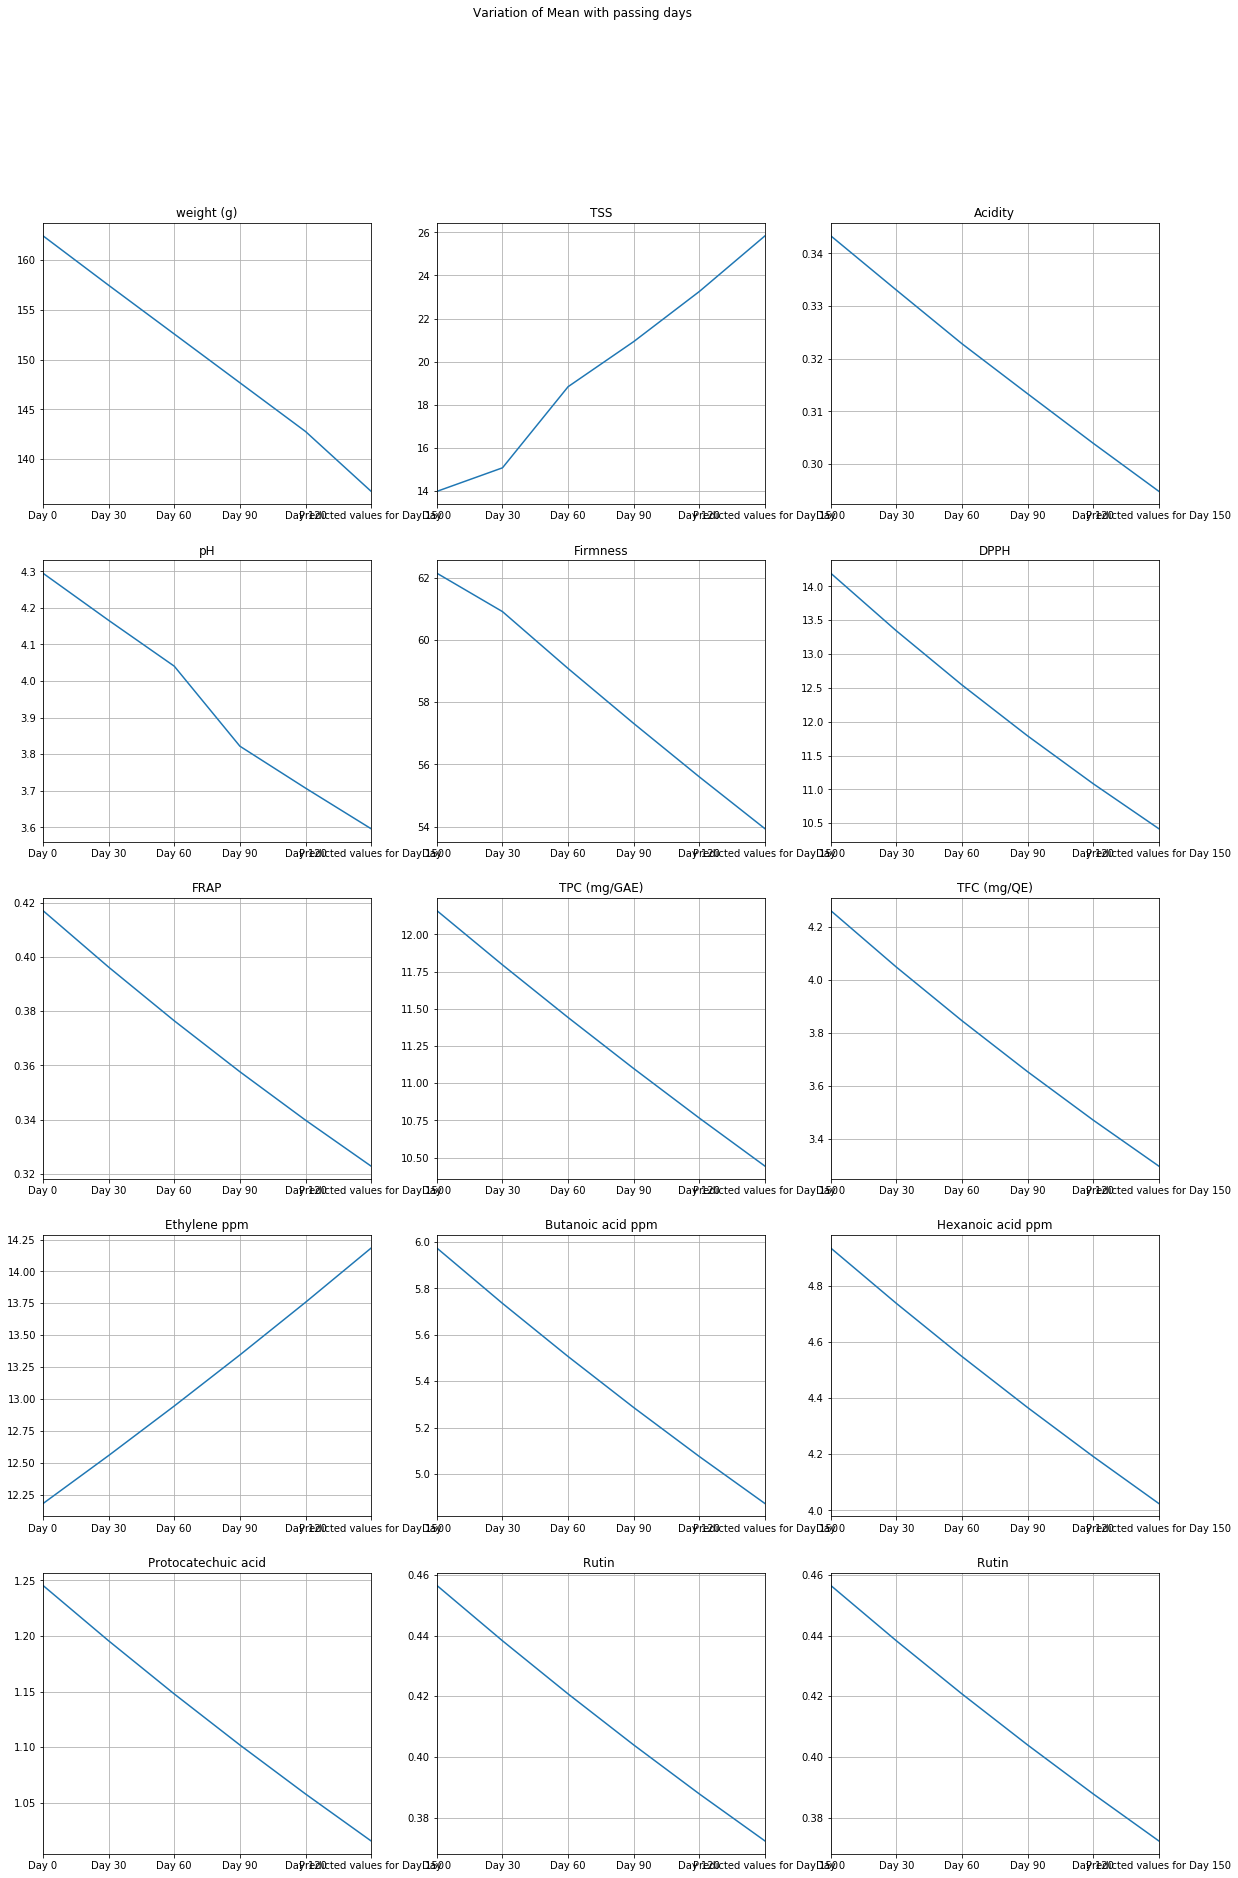

In [18]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11),(ax12,ax13,ax14)) = plt.subplots(nrows=5, ncols=3)
ax=[[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8],[ax9,ax10,ax11],[ax12,ax13,ax14]]
k=0

for i in range(5):
        for j in range(3):
                mean[columns[k]].plot(x="Days Post Harvest",ax=ax[i][j])
                
                ax[i][j].set_title(columns[k])
                #ax[i][j].set_xticks([])
                #ax[i][j].set_yticks([])
                ax[i][j].grid()

                if k < 13 : k = k +1

plt.suptitle("Variation of Mean with passing days")
plt.rcParams['figure.figsize'] = [20,30]

plt.show()


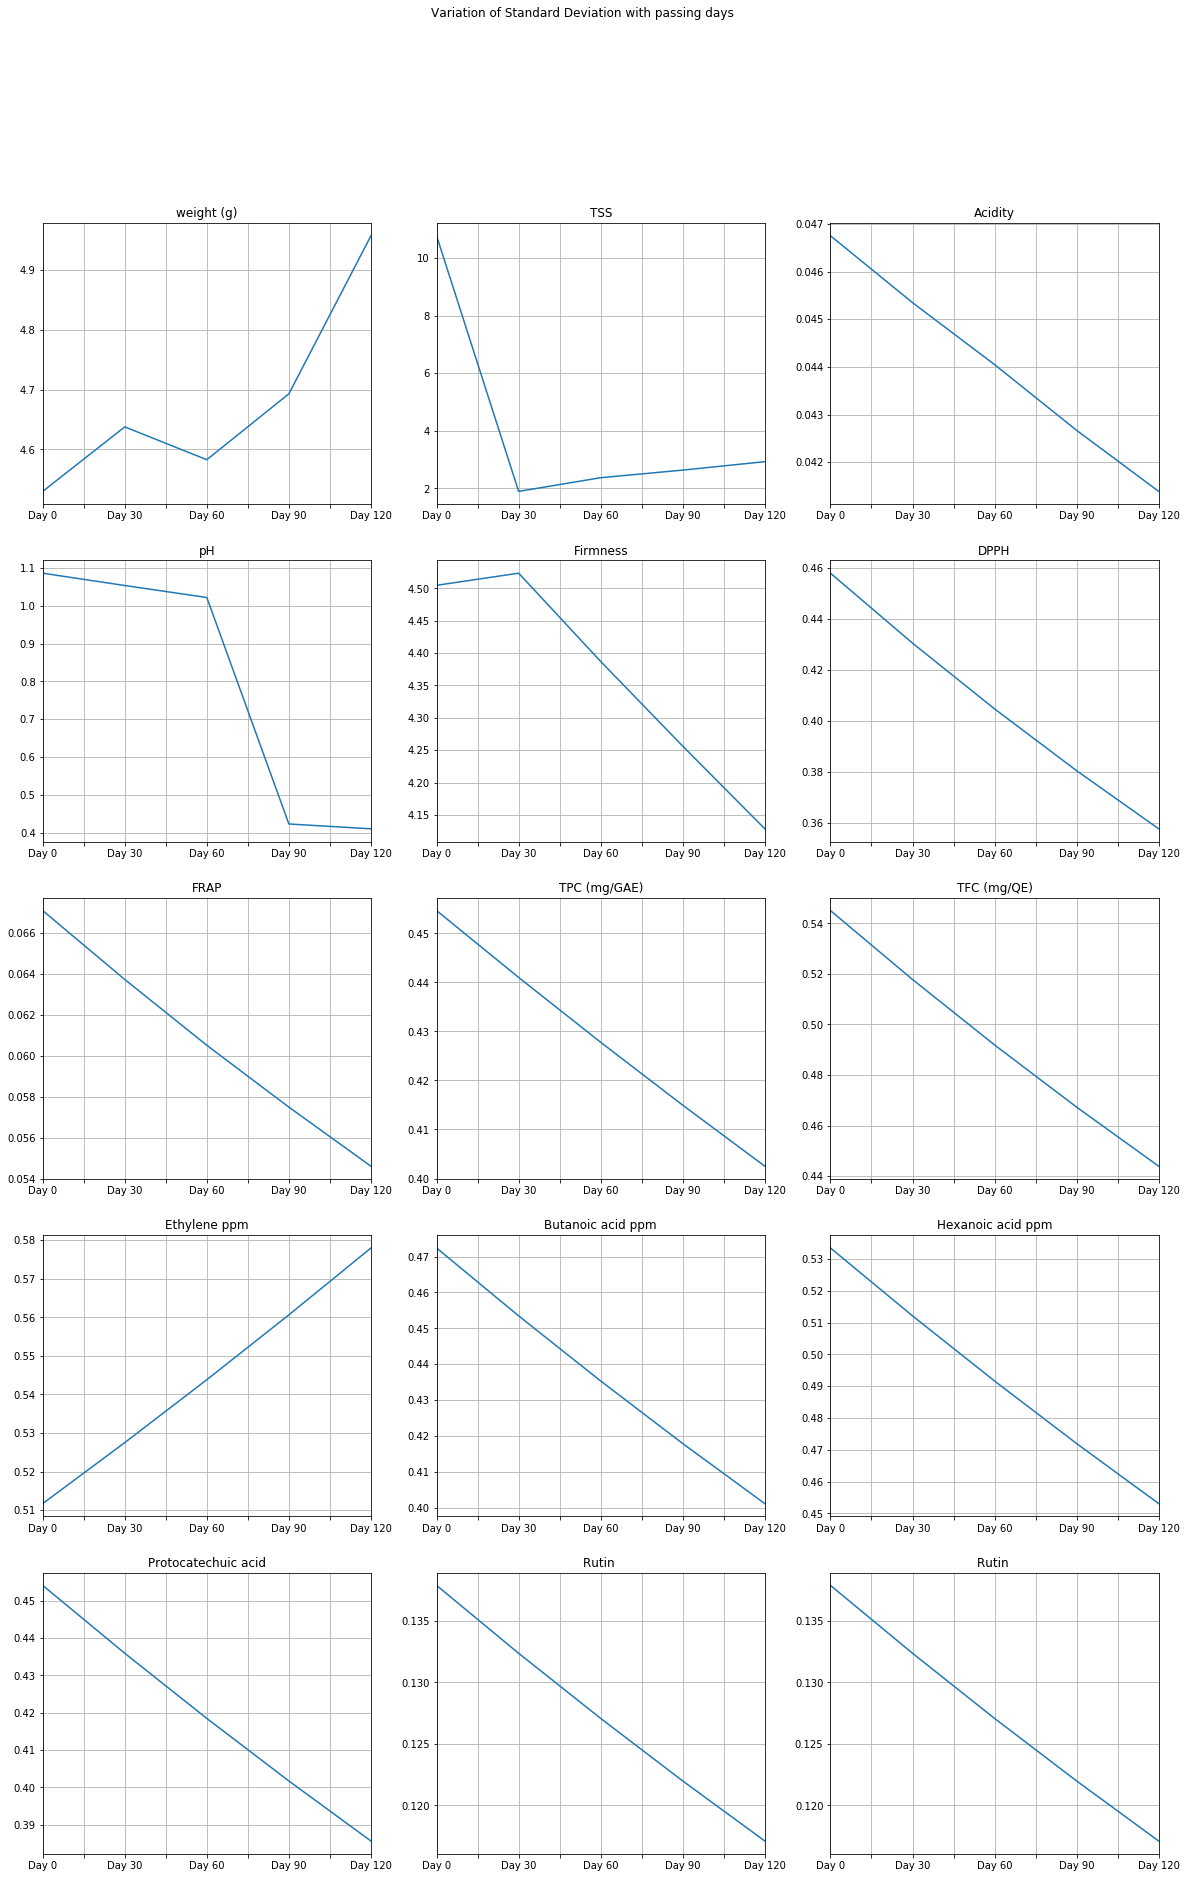

In [9]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11),(ax12,ax13,ax14)) = plt.subplots(nrows=5, ncols=3)
ax=[[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8],[ax9,ax10,ax11],[ax12,ax13,ax14]]
k=0

for i in range(5):
        for j in range(3):
                std[columns[k]].plot(x="Days Post Harvest",ax=ax[i][j])
                
                ax[i][j].set_title(columns[k])
                #ax[i][j].set_xticks([])
                #ax[i][j].set_yticks([])
                ax[i][j].grid()

                
                if k < 13 : k = k +1

plt.suptitle("Variation of Standard Deviation with passing days")
plt.rcParams['figure.figsize'] = [20,30]

plt.show()

## Analysis of graphs
- An Analysis of the graphs shows that the mean for all quantities varies approximately linearly with passing days.
- This suggests independence of individual parameters. This suggests that the concentrations of various chemicals vary linearly with each other.
- Linear ML model should be used.
---

In [10]:
rate = pd.DataFrame()
for i in range(4):
        rate[days[i]+ " - "+ days[i+1]]= ( mean.loc[days[i],:] - mean.loc[days[i+1],:] )/mean.loc[days[i],:]
rate=rate.T
rate.to_csv("rate.csv")


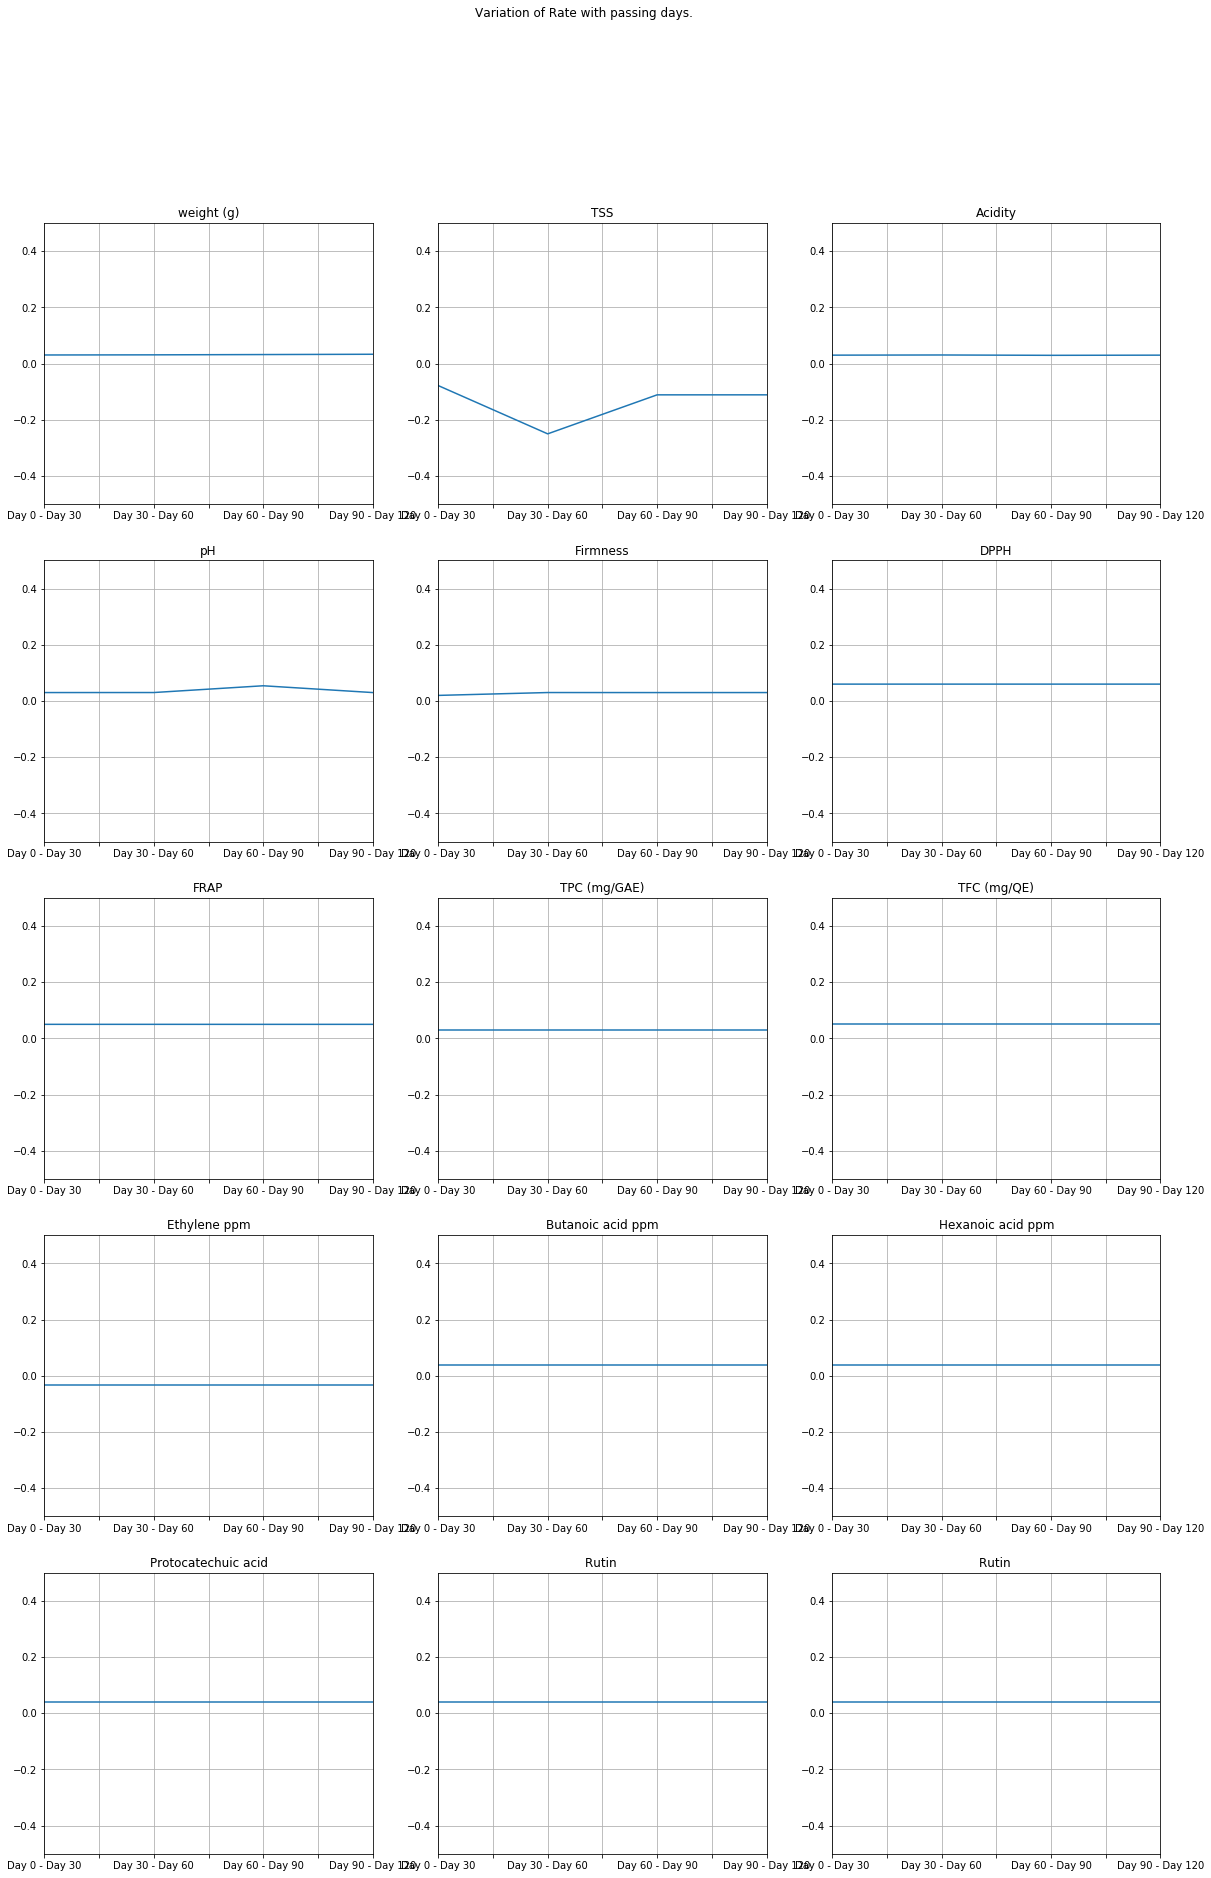

In [11]:
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11),(ax12,ax13,ax14)) = plt.subplots(nrows=5, ncols=3)
ax=[[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8],[ax9,ax10,ax11],[ax12,ax13,ax14]]
k=0

for i in range(5):
        for j in range(3):
                rate[columns[k]].plot(x="Days Post Harvest",ax=ax[i][j])
                
                ax[i][j].set_title(columns[k])
                #ax[i][j].set_xticks([])
                #ax[i][j].set_yticks([])
                #ax[i][j].set_xlim([-3, 3])
                ax[i][j].grid()
                ax[i][j].set_ylim([-0.5, 0.5])
                
                if k < 13 : k = k +1

plt.suptitle("Variation of Rate with passing days.")
plt.rcParams['figure.figsize'] = [20,30]

plt.show()

## Analysis of rate graphs
- The rate of change of Rates for all parameters remains nearly constant.
- Approximately Zero Order Kinetics followed.
***

## Prediction of Parameters
- Model used - Ordinary Least Squares.
- First parameters for Day 120 are predicted and compared against measured parameters.

In [12]:
import sklearn
from sklearn.linear_model import LinearRegression as lr
import scipy.stats as stats

In [13]:
X_train = day_60
Y_train = day_90

model = lr()

model.fit(X_train,Y_train)

print("Accuracy of the model is : {0:.2f}%".format(model.score(day_90,day_120)*100) )


Accuracy of the model is : 99.81%


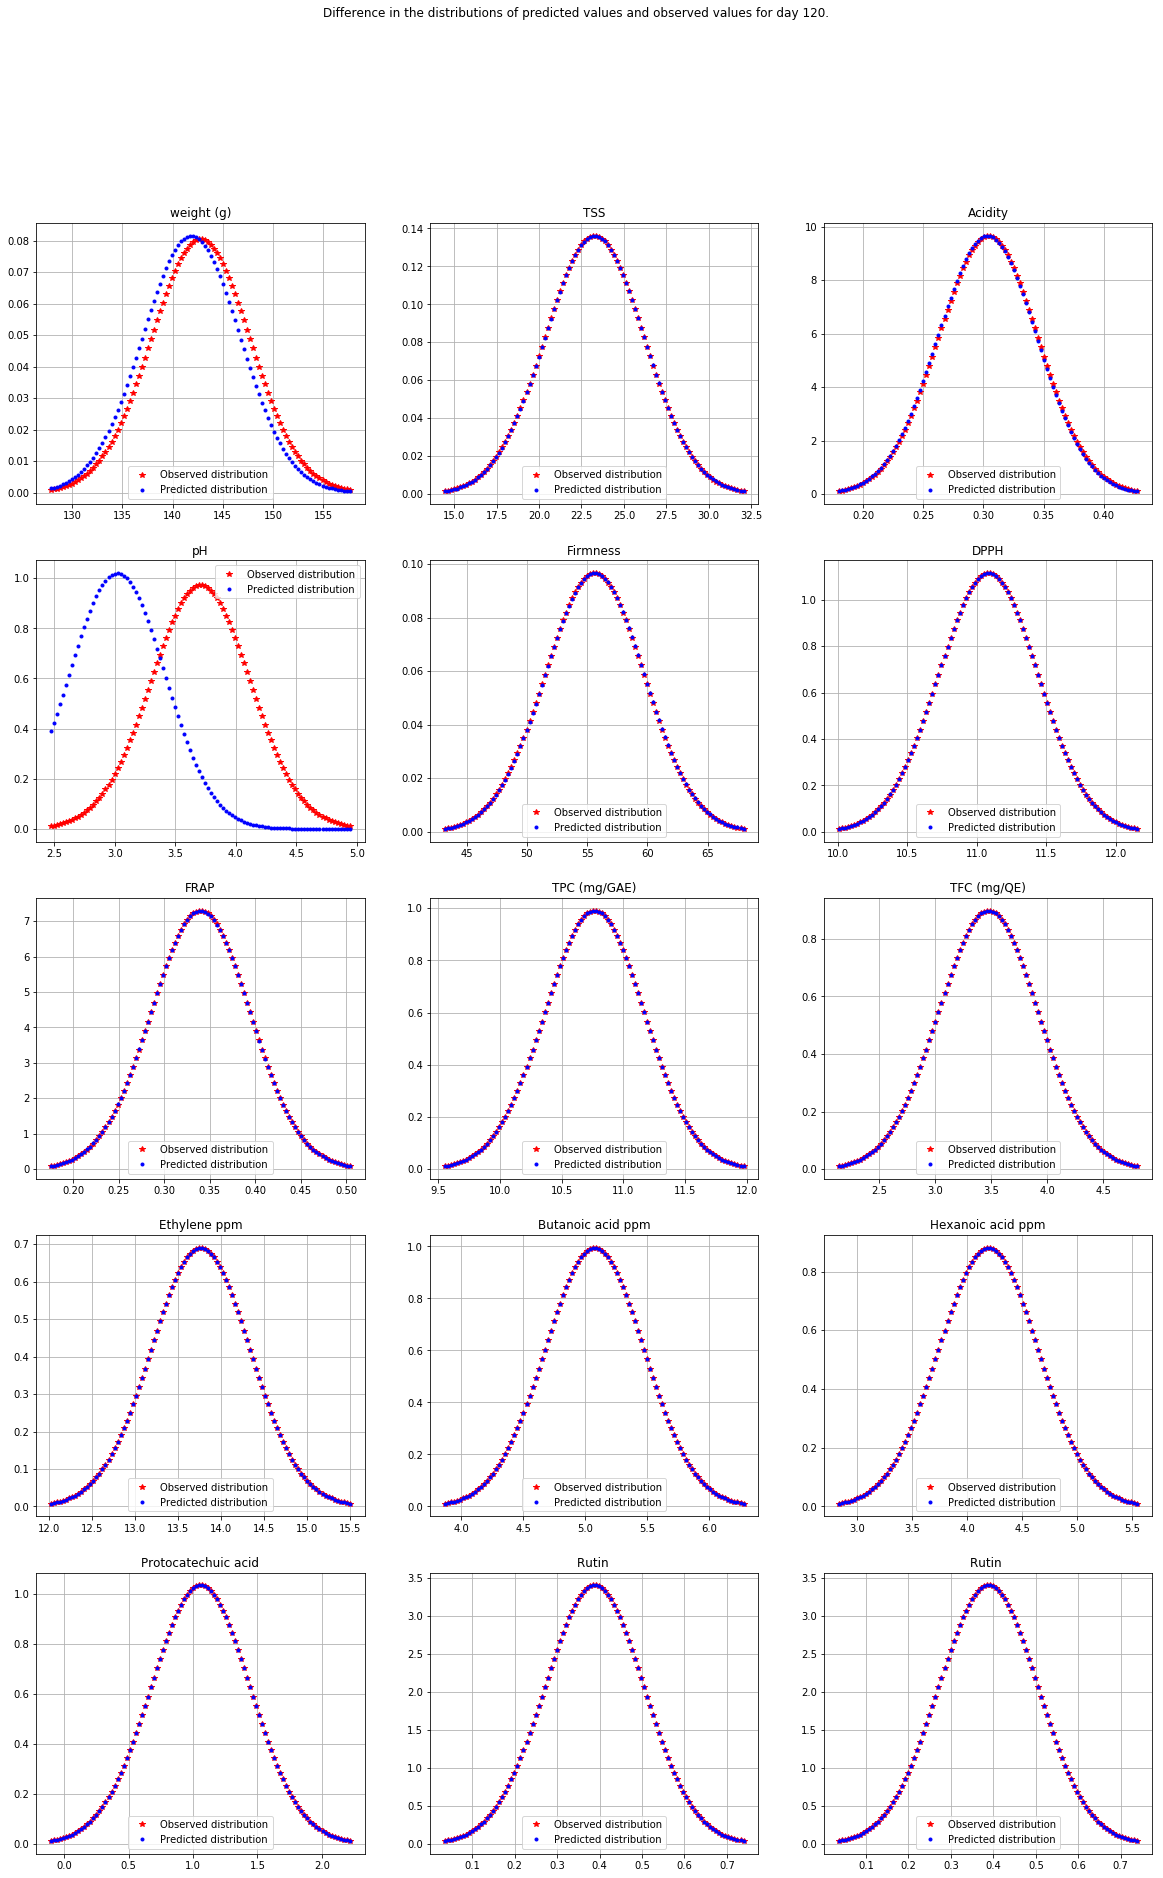

In [14]:
prediction = pd.DataFrame(model.predict(day_90))

day120 = pd.DataFrame(columns=columns,index=day_90.index.values)

for k in range(14):
    day120[columns[k]]=prediction[k+1]
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11),(ax12,ax13,ax14)) = plt.subplots(nrows=5, ncols=3)
ax=[[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8],[ax9,ax10,ax11],[ax12,ax13,ax14]]
k=0

for i in range(5):
        for j in range(3):
                
                mu1=day_120[columns[k]].mean()
                sigma1=day_120[columns[k]].std()
                x = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
                mu2=day120[columns[k]].mean()
                sigma2=day120[columns[k]].std()
                
                ax[i][j].plot(x, stats.norm.pdf(x, mu1, sigma1),'r*',label="Observed distribution")
                ax[i][j].plot(x, stats.norm.pdf(x, mu2, sigma2),'b.',label="Predicted distribution")
                
                ax[i][j].set_title(columns[k])
                ax[i][j].grid()
                ax[i][j].legend()
                
                if k < 13 : k = k +1

plt.suptitle("Difference in the distributions of predicted values and observed values for day 120.")
plt.rcParams['figure.figsize'] = [20,30]

plt.show()


## Observation : 
- Near perfect overlap denotes high degree of accuracy.

***

## Prediction of parameters for day 150 based on the above trained model.

In [15]:
X_train = day_90
Y_train = day_120

model = lr()

model.fit(X_train,Y_train)

prediction = pd.DataFrame(model.predict(day_120))

day_150 = pd.DataFrame(columns=columns,index=day_120.index.values)

for k in range(14):
    day_150[columns[k]]=prediction[k+1]
    


day_150.to_csv("Predicted Parameters for day 150.csv")

***
## Analysis of the difference in the distributions before and after considering predicted values for day 150.

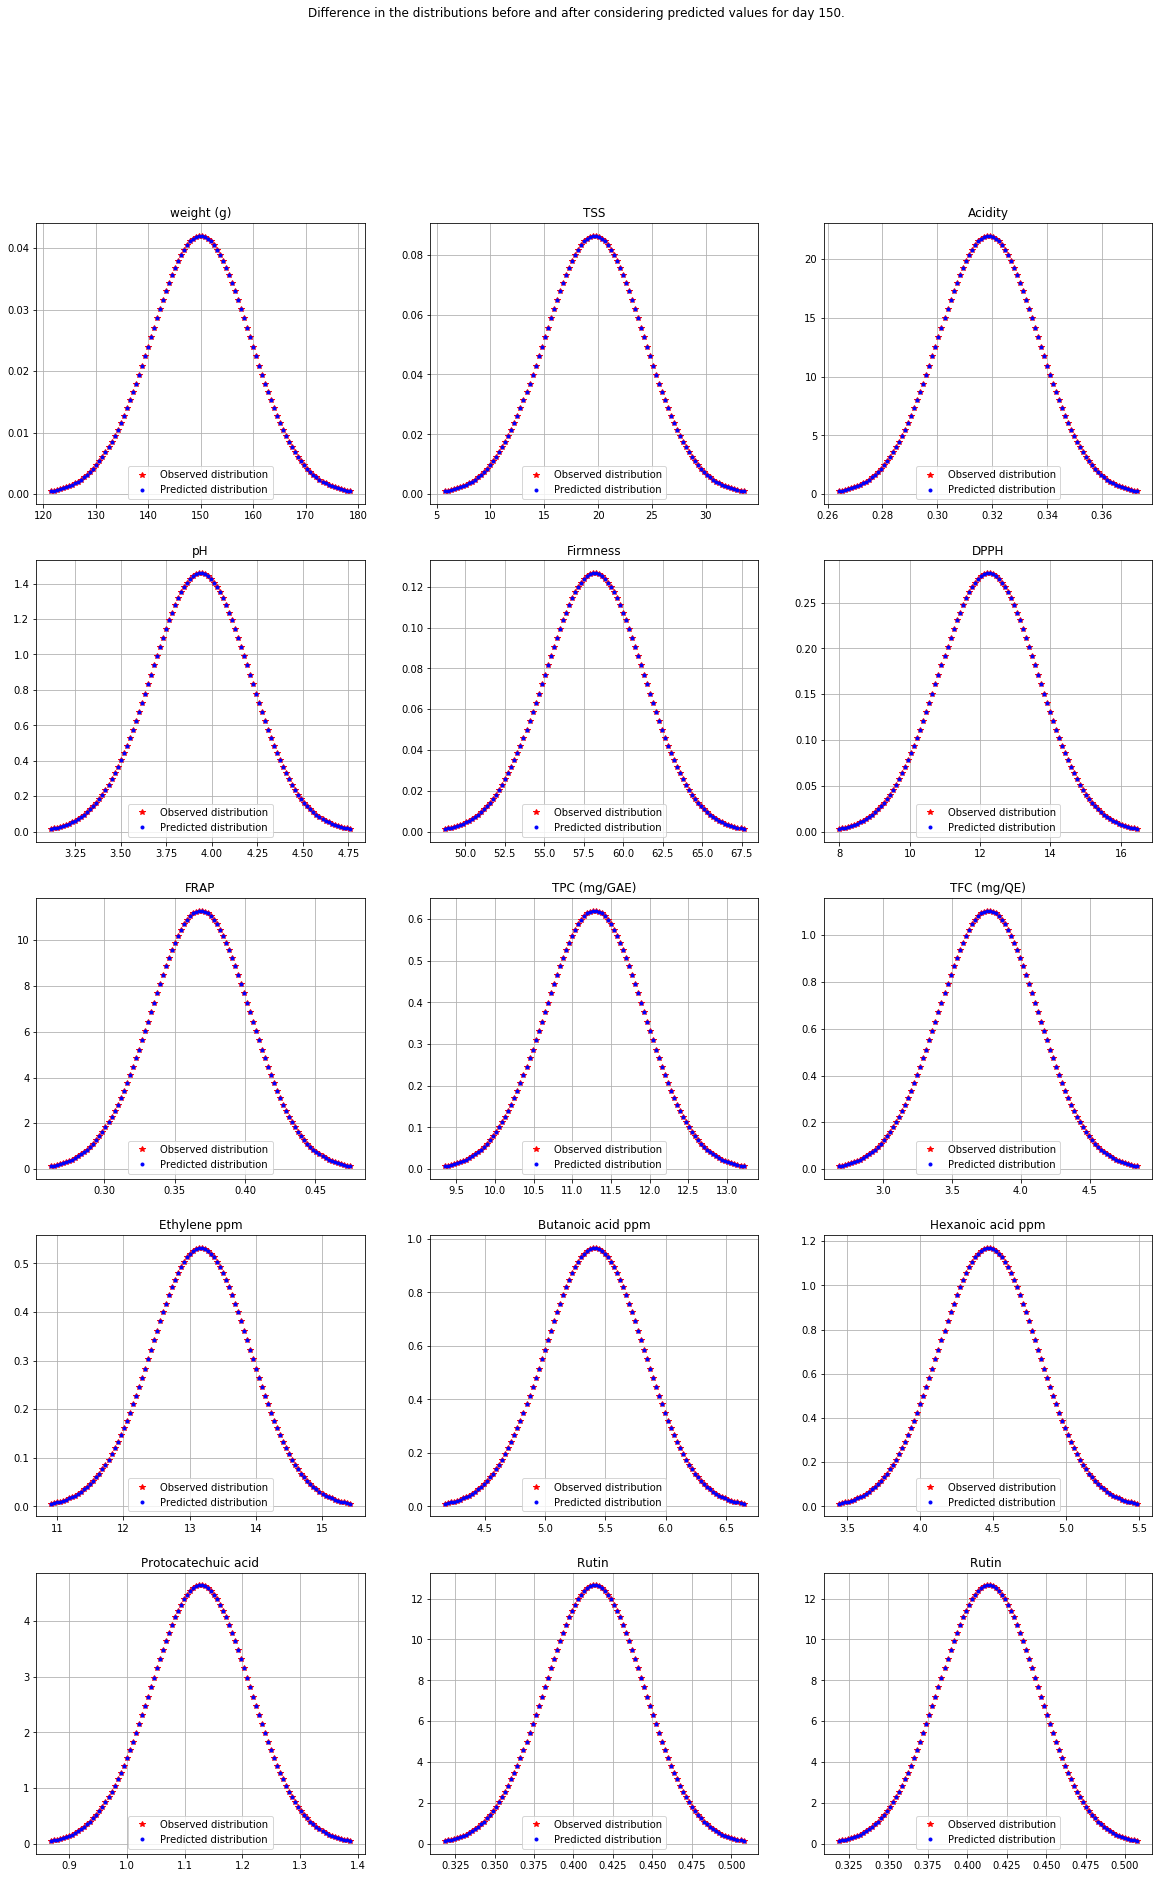

In [16]:
new_mean = mean
new_std = std
new_mean.loc["Predicted values for Day 150"]= day_150.mean()
new_std.loc["Predicted values for Day 150"]= day_150.std()

for k in range(14):
    day120[columns[k]]=prediction[k+1]
fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8),(ax9,ax10,ax11),(ax12,ax13,ax14)) = plt.subplots(nrows=5, ncols=3)
ax=[[ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8],[ax9,ax10,ax11],[ax12,ax13,ax14]]
k=0

for i in range(5):
        for j in range(3):
                
                mu1=mean[columns[k]].mean()
                sigma1=mean[columns[k]].std()
                x = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
                mu2=new_mean[columns[k]].mean()
                sigma2=new_mean[columns[k]].std()
                
                ax[i][j].plot(x, stats.norm.pdf(x, mu1, sigma1),'r*',label="Observed distribution")
                ax[i][j].plot(x, stats.norm.pdf(x, mu2, sigma2),'b.',label="Predicted distribution")
                
                ax[i][j].set_title(columns[k])
                ax[i][j].grid()
                ax[i][j].legend()
                
                if k < 13 : k = k +1

plt.suptitle("Difference in the distributions before and after considering predicted values for day 150.")
plt.rcParams['figure.figsize'] = [20,30]
plt.show()

***

## Producing Final Excel Sheet

In [17]:
apple = pd.ExcelWriter("Final Values for Apples.xlsx")
day_0.to_excel(apple, "Day 0")
os.remove("Day 0.csv")
day_30.to_excel(apple, "Day 30")
os.remove("Day 30.csv")
day_60.to_excel(apple, "Day 60")
os.remove("Day 60.csv")
day_90.to_excel(apple, "Day 90")
os.remove("Day 90.csv")
day_120.to_excel(apple, "Day 120")
os.remove("Day 120.csv")
day_150.to_excel(apple, "Predicted Values for Day 150")
os.remove("Predicted Parameters for day 150.csv")

os.remove("mean.csv")
os.remove("std.csv")
os.remove("rate.csv")
os.remove("Sheet1.csv")

apple.save()

***